# Easy21 Environment

In [1]:
import easy21

## Initialization

In [2]:
env = easy21.Easy21()

In [3]:
dealer_initial, player_initial = env.draw_first_card(), env.draw_first_card()
player_initial, dealer_initial

(5, 2)

## Always Play Stick

In [4]:
player, dealer = player_initial, dealer_initial
player, reward, dealer, end = env.step(dealer, player, "stick")
player, reward, dealer, end

(5, -1, 19, True)

## Always Play Hit

In [5]:
player, dealer = player_initial, dealer_initial
player, reward, dealer, end = env.step(dealer, player, "hit")
player, reward, dealer, end

(-2, -1, 2, True)

# Monte-Carlo Control

In [6]:
import learning

## Simple Testing for Epsilon Greedy Policy

In [7]:
q_state_action = {
    (0, 0, "hit"): 1,
    (0, 0, "stick"): 1,
}
def get_q_value_or_default(state_action):
    return q_state_action.get(state_action, 0.0)
learning.epsilon_greedy_policy(0, 0, get_q_value_or_default)

'stick'

## Monte-Carlo Control Algorithm

In [8]:
mc_q_state_action = learning.monte_carlo_control(episodes=1_000_000)
mc_value_function = learning.q_to_value_function(mc_q_state_action)
mc_policy = learning.q_to_policy(mc_q_state_action)

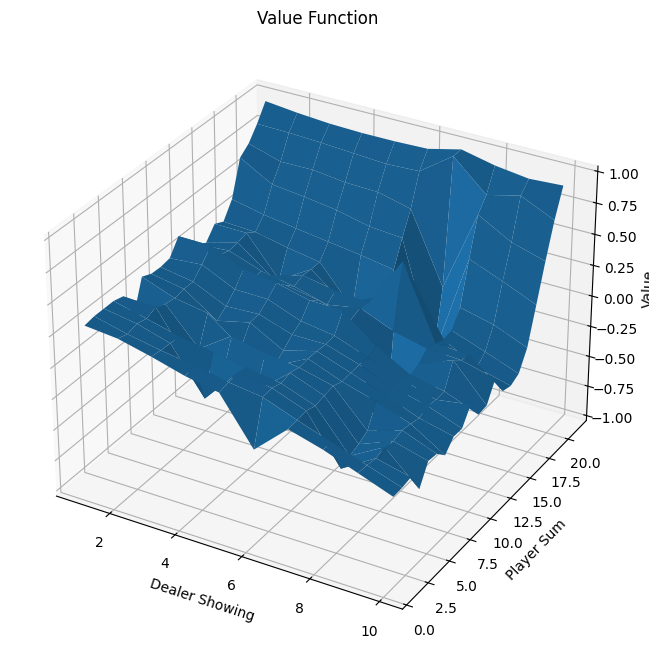

In [9]:
learning.plot_value_function(mc_value_function)

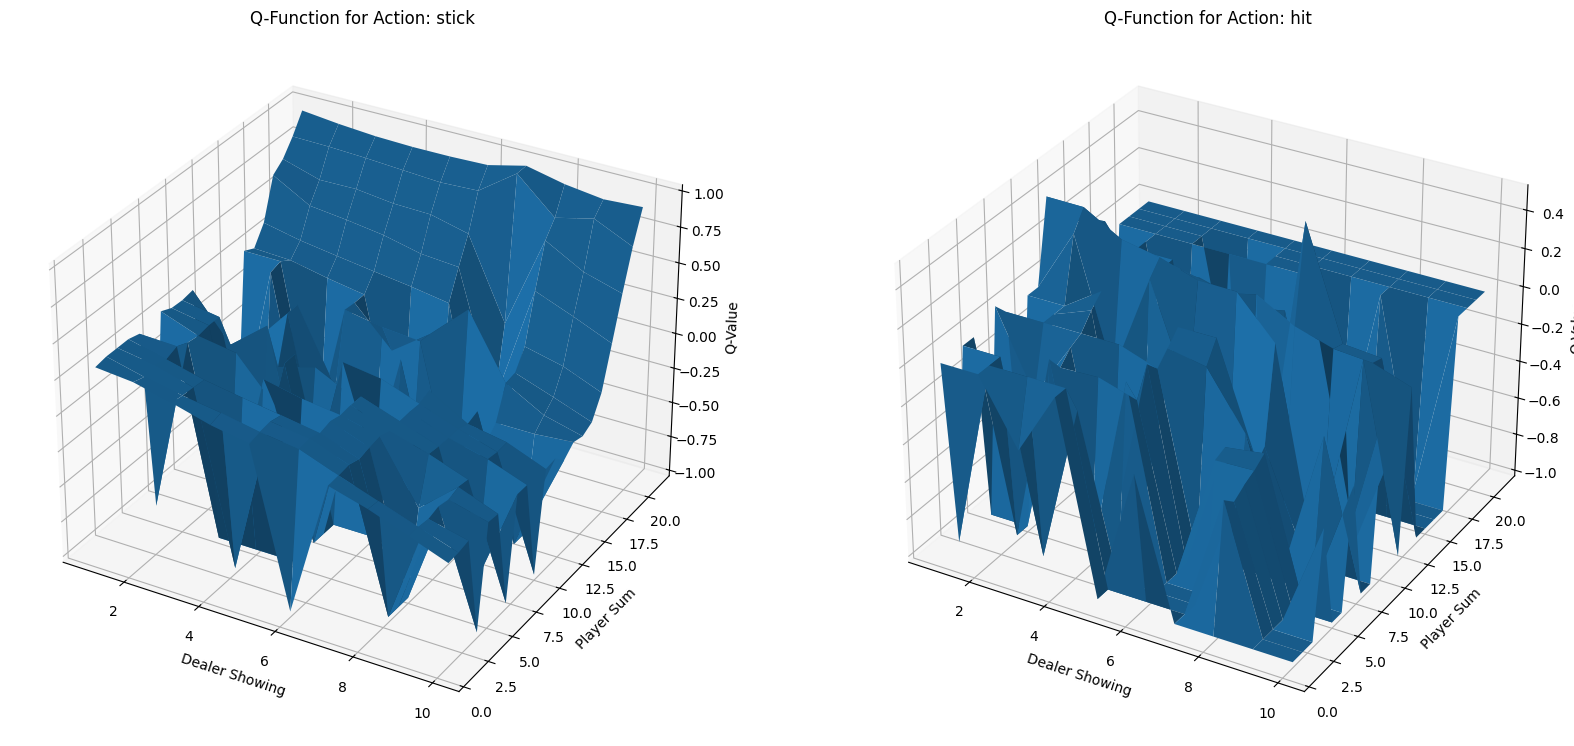

In [10]:
learning.plot_q_function(mc_q_state_action)

If dealer showing 10 and player sum is currently 21, should they player stick to its current sum or hit another card? The player should stick because `mc_q_state_action[(9, 21, "stick")] > mc_q_state_action[(9, 21, "hit")]`

In [11]:
print(mc_q_state_action[(9, 21, "stick")])
print(mc_q_state_action[(9, 21, "hit")])
print(mc_q_state_action[(9, 21, "stick")] > mc_q_state_action[(9, 21, "hit")])

0.90625


KeyError: (9, 21, 'hit')

In [ ]:
learning.plot_policy(mc_policy)

# Sarsa Lambda Control Algorithm

In [12]:
import learning

sarsa_q_state_action, _ = learning.sarsa_lambda_control(episodes=100_000, gamma=1.0, llambda=1.0)
sarsa_value_function = learning.q_to_value_function(sarsa_q_state_action)
sarsa_policy = learning.q_to_policy(sarsa_q_state_action)

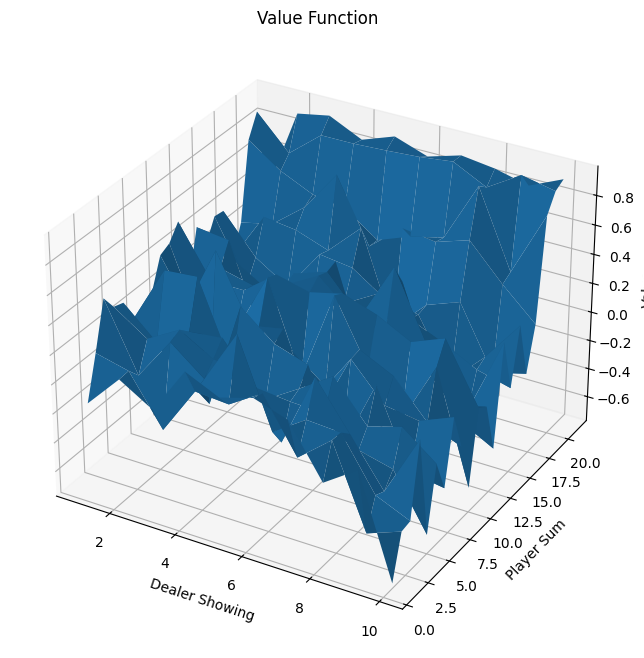

In [13]:
learning.plot_value_function(sarsa_value_function)

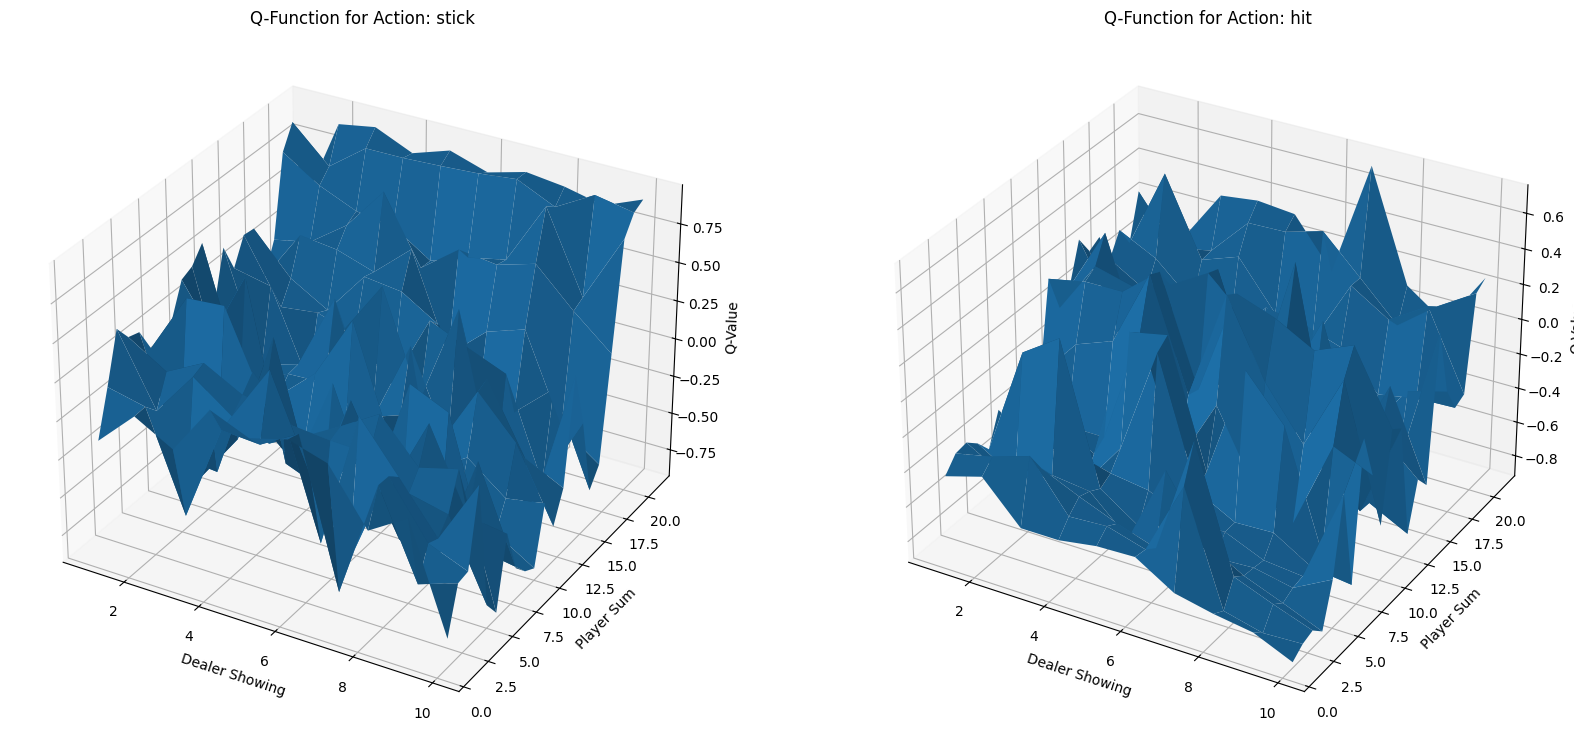

In [14]:
learning.plot_q_function(sarsa_q_state_action)

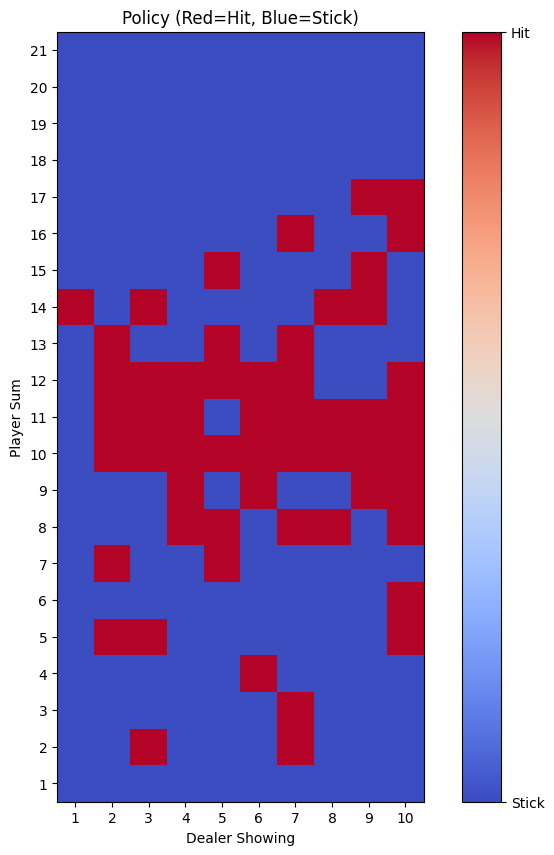

In [15]:
learning.plot_policy(sarsa_policy)

In [16]:
lambda_to_mse = {}
for l in [x / 10 for x in range(0, 11)]:
    temp_sarsa_q_state_action, _ = learning.sarsa_lambda_control(episodes=100_000, gamma=1.0, llambda=l)
    lambda_to_mse[l] = learning.compute_mse(mc_q_state_action, temp_sarsa_q_state_action)

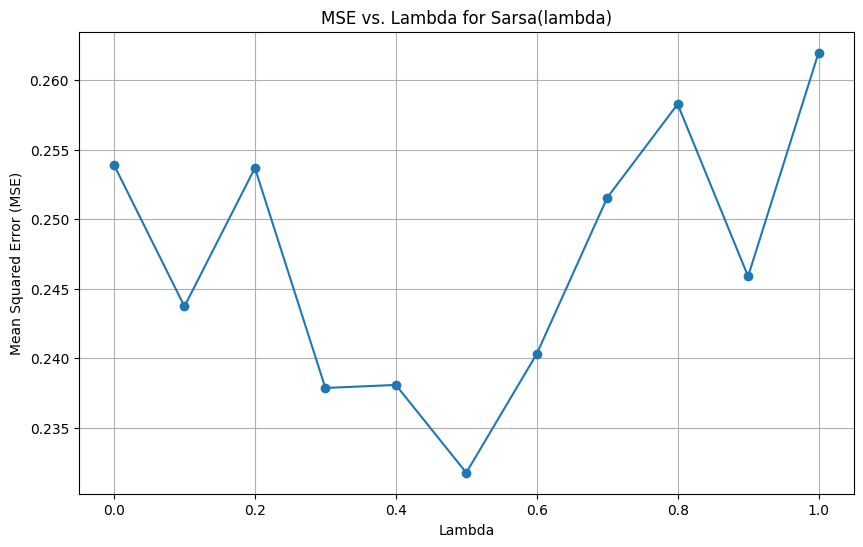

In [17]:
learning.plot_lambda_mse(lambda_to_mse)

In [18]:
_, mse_lambda_0 = learning.sarsa_lambda_control(episodes=20_000, gamma=1.0, llambda=0, mc_q_state_action=mc_q_state_action)
_, mse_lambda_1 = learning.sarsa_lambda_control(episodes=20_000, gamma=1.0, llambda=1, mc_q_state_action=mc_q_state_action)

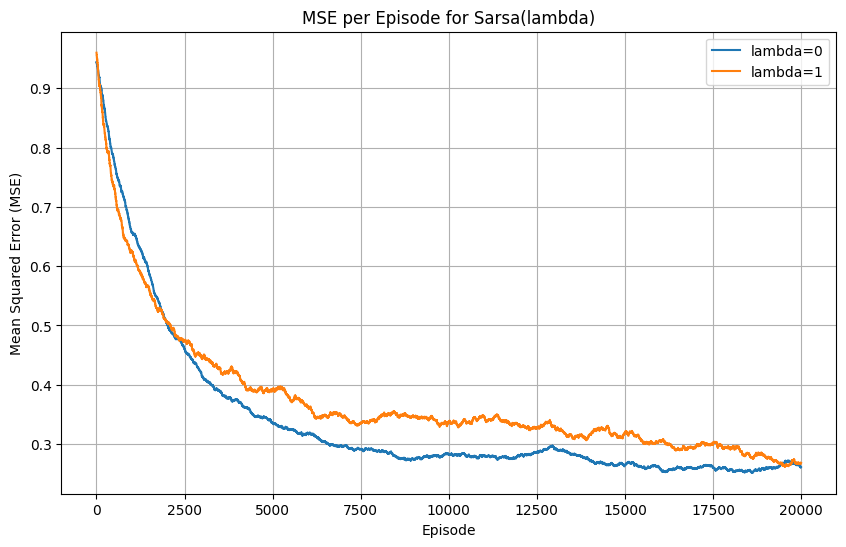

In [19]:
learning.plot_mse_per_episode(mse_lambda_0, mse_lambda_1, "lambda=0", "lambda=1")

# Linear Function Approximation Control Algorithm

In [20]:
import learning

approx_q_state_action, _ = learning.linear_function_approximation_control(episodes=1000, epsilon=0.05, alpha=0.01, gamma=1.0, llambda=0.9, debug=False)
approx_value_function = learning.q_to_value_function(approx_q_state_action)
approx_policy = learning.q_to_policy(approx_q_state_action)

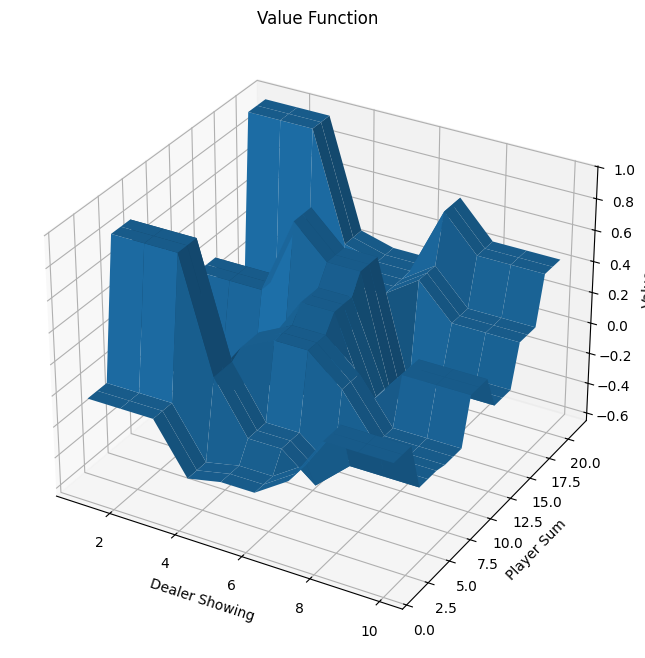

In [21]:
learning.plot_value_function(approx_value_function)

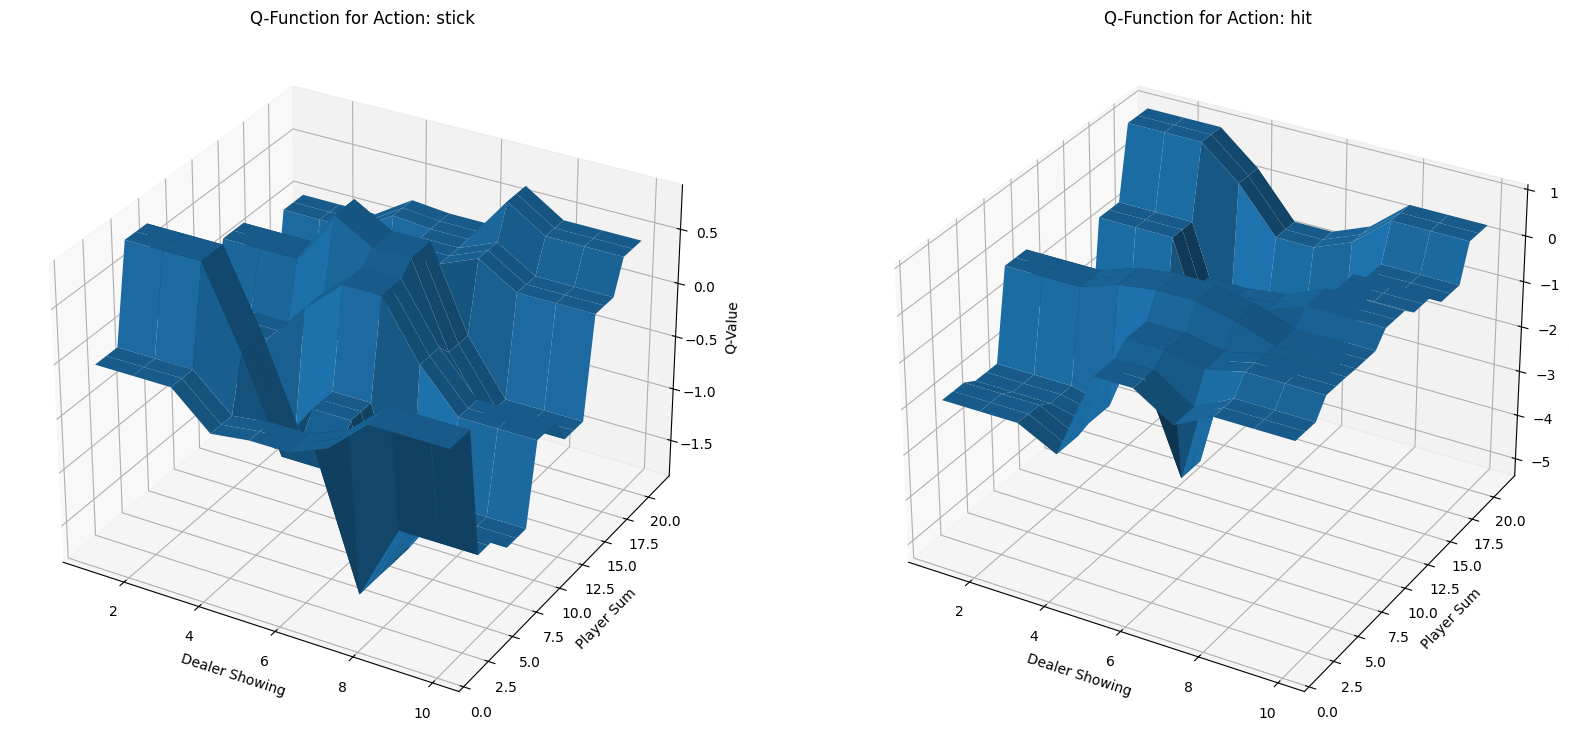

In [22]:
learning.plot_q_function(approx_q_state_action)

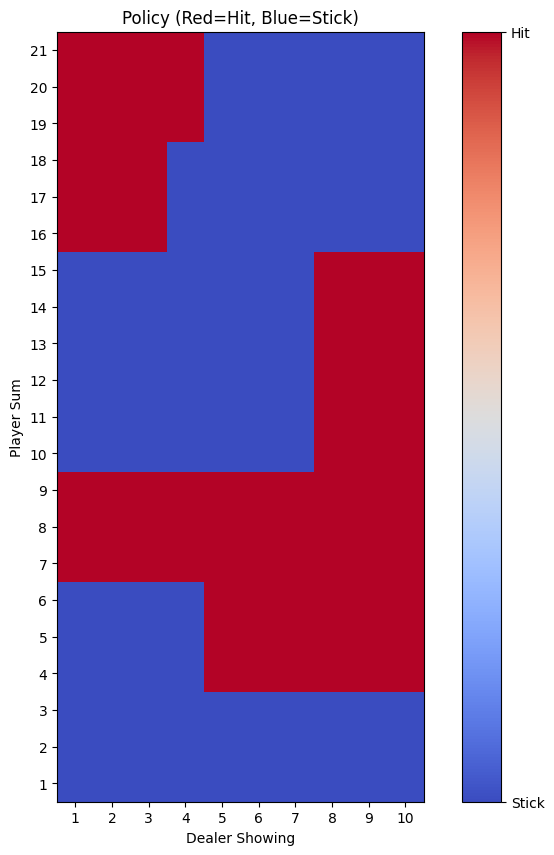

In [23]:
learning.plot_policy(approx_policy)

In [25]:
approx_lambda_to_mse = {}
for l in [x / 10 for x in range(0, 11)]:
    temp_approx_q_state_action, _ = learning.linear_function_approximation_control(episodes=1_000, gamma=1.0, llambda=l)
    approx_lambda_to_mse[l] = learning.compute_mse(mc_q_state_action, temp_approx_q_state_action)

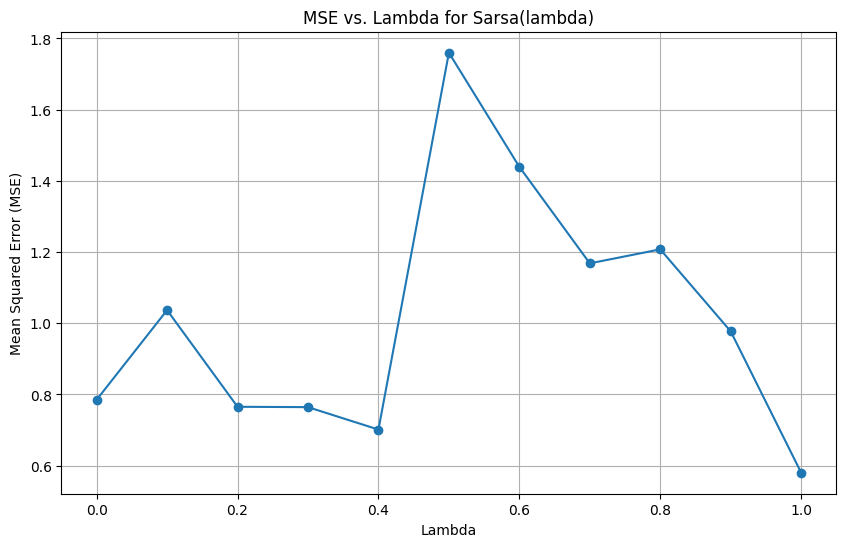

In [26]:
learning.plot_lambda_mse(approx_lambda_to_mse)

In [27]:
_, approx_mse_lambda_0 = learning.linear_function_approximation_control(episodes=1_000, epsilon=0.05, alpha=0.01, gamma=1.0, llambda=1.0, mc_q_state_action=mc_q_state_action)
_, approx_mse_lambda_1 = learning.linear_function_approximation_control(episodes=1_000, epsilon=0.05, alpha=0.01, gamma=1.0, llambda=1.0, mc_q_state_action=mc_q_state_action)

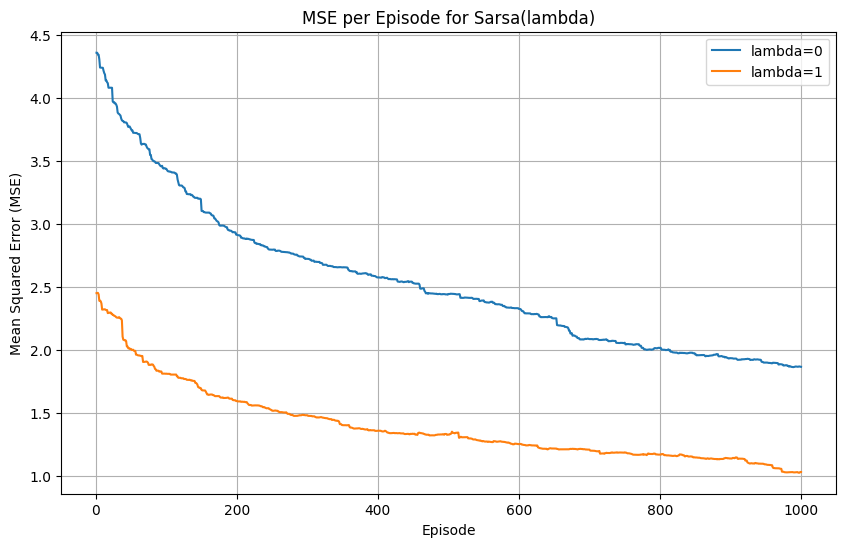

In [28]:
learning.plot_mse_per_episode(approx_mse_lambda_0, approx_mse_lambda_1, "lambda=0", "lambda=1")